In [2]:
import matplotlib.pyplot as plt
import numpy as np
import json 

In [4]:
def calculate_energy(height, velocity):
    return 9.8 * (height - 0.8) + velocity * velocity * 0.5

temp = 0
num_of_Dt = 0
num_of_dt = 0
def statistic_time(time):
    delta = time - temp
    if (delta >= 0.0001): 
        num_of_Dt += 1
    if delta <= 0.00009: 
        num_of_dt += 1
    temp = time

def process_ball_free_fall_state_data(file_name, sample_gap, num_of_plots):
    timeline = []
    realtime_rate = []
    balls_z = [[] for i in range(num_of_plots)]
    balls_vz = [[] for i in range(num_of_plots)]
    with open(file_name, 'r') as file:
        line = file.readline()
        while line:
            result = line.split(" ")
            timeline.append(float(result[0]))
            realtime_rate.append(float(result[1]))
            parts_pe = json.loads(result[2])
            parts_vs = json.loads(result[3])
            for i in range(num_of_plots):
                balls_z[i].append(parts_pe[i + 1][2])
                balls_vz[i].append(parts_vs[i + 1][2])
            line = file.readline()

        new_z = [[] for i in range(num_of_plots)]
        new_vz = [[] for i in range(num_of_plots)]
        new_energy = [[] for i in range(num_of_plots)]
        new_timeline = []
        new_realtime_rate = []
        record_time = -10
        temp = 0
        num_of_Dt = 0
        num_of_dt = 0
        for i in range(len(timeline)):
            delta = timeline[i] - temp
            if (delta >= 0.0001): 
                num_of_Dt += 1
            if delta <= 0.00009: 
                num_of_dt += 1
            temp = timeline[i]
            
            if timeline[i] > record_time + sample_gap:
                new_timeline.append(timeline[i])
                new_realtime_rate.append(realtime_rate[i])
                for j in range(num_of_plots):
                    new_z[j].append(balls_z[j][i])
                    new_vz[j].append(balls_vz[j][i])
                    new_energy[j].append(calculate_energy(balls_z[j][i], balls_vz[j][i]))
                record_time = timeline[i]
        
        for i in range(num_of_plots):
            ref = new_energy[i][0]
            for j in range(len(new_energy[i])):
                new_energy[i][j] = new_energy[i][j] / ref
        return new_timeline, new_z, new_vz, new_energy, new_realtime_rate, (num_of_Dt, num_of_dt)
    
def plot_with_boundary(result, num_of_ball, max_time):
    new_timeline, new_z, new_vz, new_energy, new_realtime_rate, dt = result
    boundary_index = len(new_timeline)
    for i in range(boundary_index):
        if new_timeline[i] > max_time:
            boundary_index = i
            break

    fig, axs = plt.subplots(1, num_of_ball + 1, figsize=(15, 5))
    titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
    for j in range(num_of_ball):
        # plt.scatter(timeline, balls_z[0], s=1)
        axs[j].scatter(new_timeline[:boundary_index], new_z[j][:boundary_index], s=5)
        # Add labels and title
        axs[j].set_xlabel('time/s')
        axs[j].set_ylabel('height/m')
        axs[j].set_title(titles[j])

        # ax2 = axs[j].twinx()
        # ax2.plot(new_timeline, new_energy[j], 'r')
        # ax2.set_ylabel('Energy/J')
    axs[num_of_ball].scatter(new_timeline[1:boundary_index], new_realtime_rate[1:boundary_index], c="r", s=5)
    axs[num_of_ball].set_xlabel('time/s')
    axs[num_of_ball].set_ylabel('realtime_rate')
    axs[num_of_ball].set_title("realtime_rate")


    # Show the plot
    plt.tight_layout()
    plt.show()
    

## Figure 01: 1e-6 as reference trajectory

In [218]:
num_of_ball = 3
sample_gap = 0.02
file_path = 'C:\\sire\\sire-1.0\\demo\\release\\demo_simulation_free_fall\\log\\state-log--2024-02-27--01-40-29--.txt'
result_Dt6 = process_ball_free_fall_state_data(file_path, sample_gap, num_of_ball)

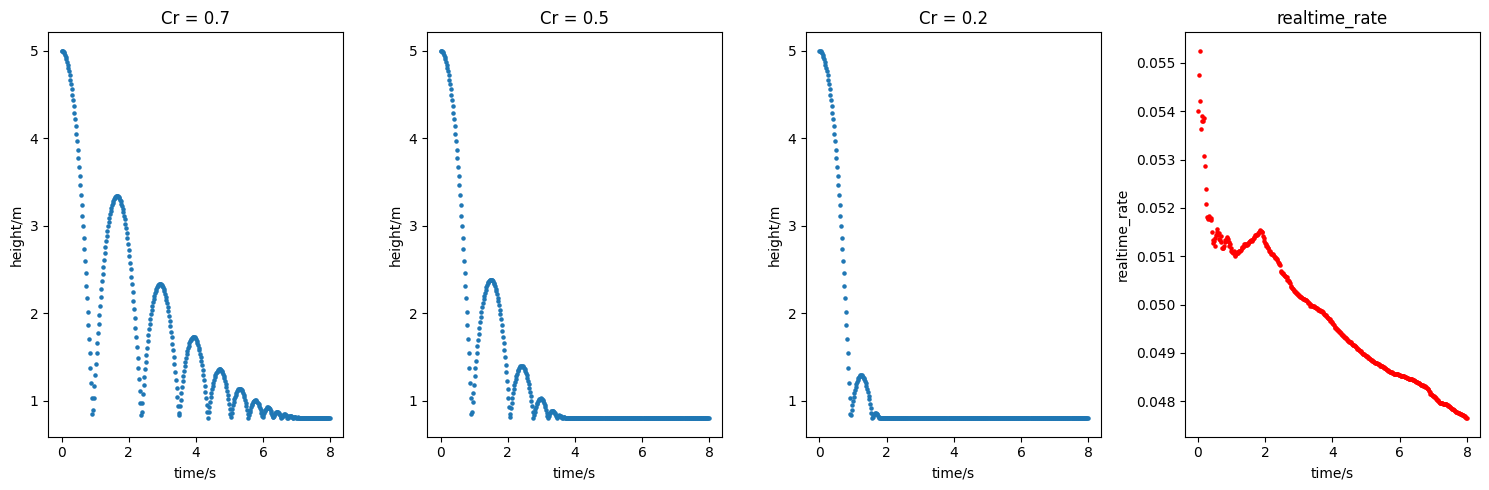

In [219]:
plot_with_boundary(result_Dt6, num_of_ball, 8)

# Figure 02: 1e-4 global time step result

In [212]:
num_of_ball = 3
sample_gap = 0.02
file_path = 'state-log-three-ball-fall-Dt0.0001-no-shrink.txt'
result_Dt4 = process_ball_free_fall_state_data(file_path, sample_gap, num_of_ball)

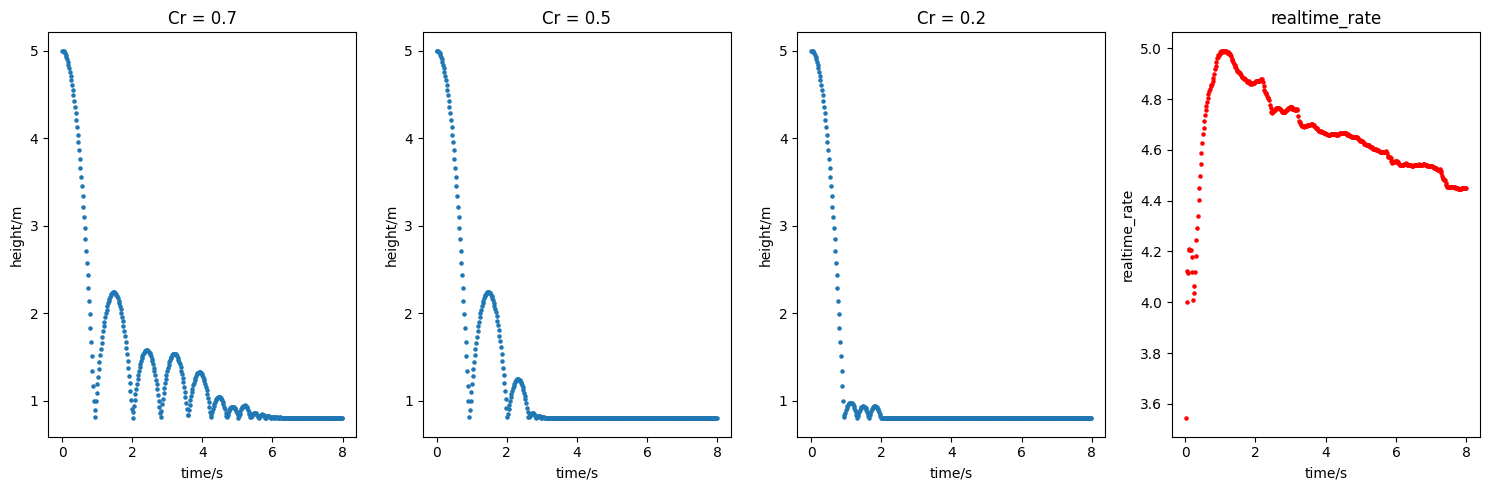

In [213]:
plot_with_boundary(result_Dt4, num_of_ball, 8)

## Figure 03: 1e-5 global time step result

In [215]:
num_of_ball = 3
sample_gap = 0.02
file_path = 'C:\\sire\\sire-1.0\\demo\\release\\demo_simulation_free_fall\\log\\state-log--2024-02-27--11-01-30--.txt'
result_Dt5 = process_ball_free_fall_state_data(file_path, sample_gap, num_of_ball)

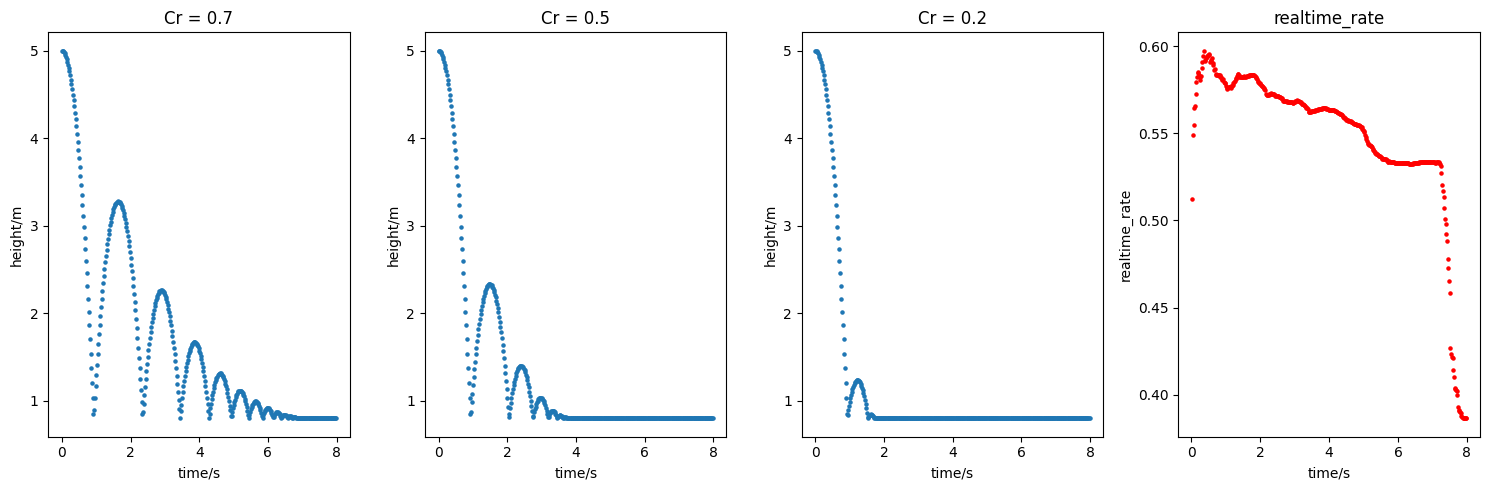

In [216]:
plot_with_boundary(result_Dt5, num_of_ball, 8)

## Figure 04: 1e-4 and 1e-5 without penetration adjustment result

In [222]:
num_of_ball = 3
sample_gap = 0.02
file_path = 'state-log-three-ball-fall-Dt0.0001-dt0.00001-withoutPA.txt'
result_Dt4_dt5 = process_ball_free_fall_state_data(file_path, sample_gap, num_of_ball)

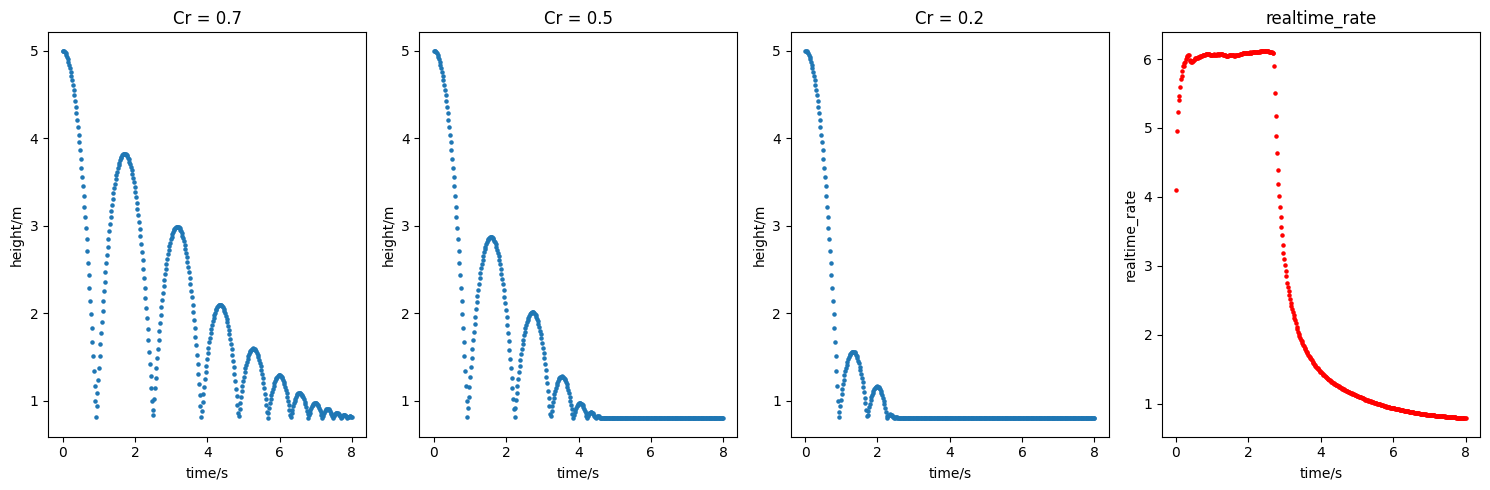

In [223]:
plot_with_boundary(result_Dt4_dt5, num_of_ball, 8)

## Figure 05: 1e-3 and 1e-5 with penetration adjustment result 

In [199]:
num_of_ball = 3
result_Dt3_dt5_PA = process_ball_free_fall_state_data('state-log--2024-02-21--14-10-25--.txt', 0.02, num_of_ball, 10)

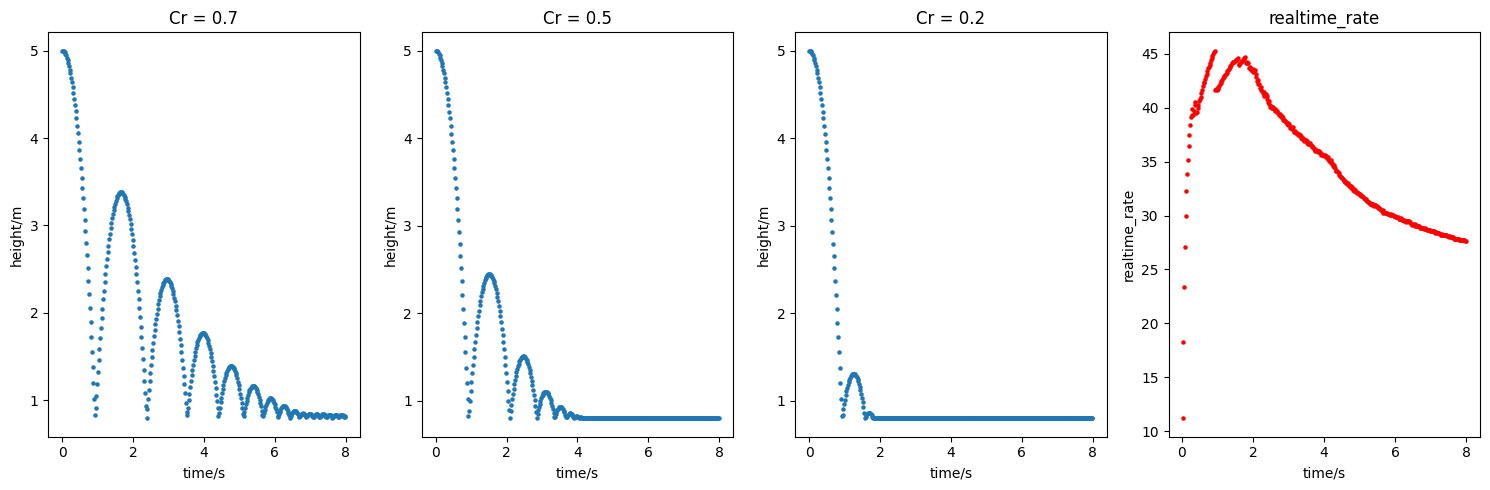

In [224]:
plot_with_boundary(result_Dt3_dt5_PA, num_of_ball, 8)

In [65]:
num_of_ball = 3
new_timeline, new_z = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.0001-dt0.000101-withPA.txt', 0.02, num_of_ball, 10)

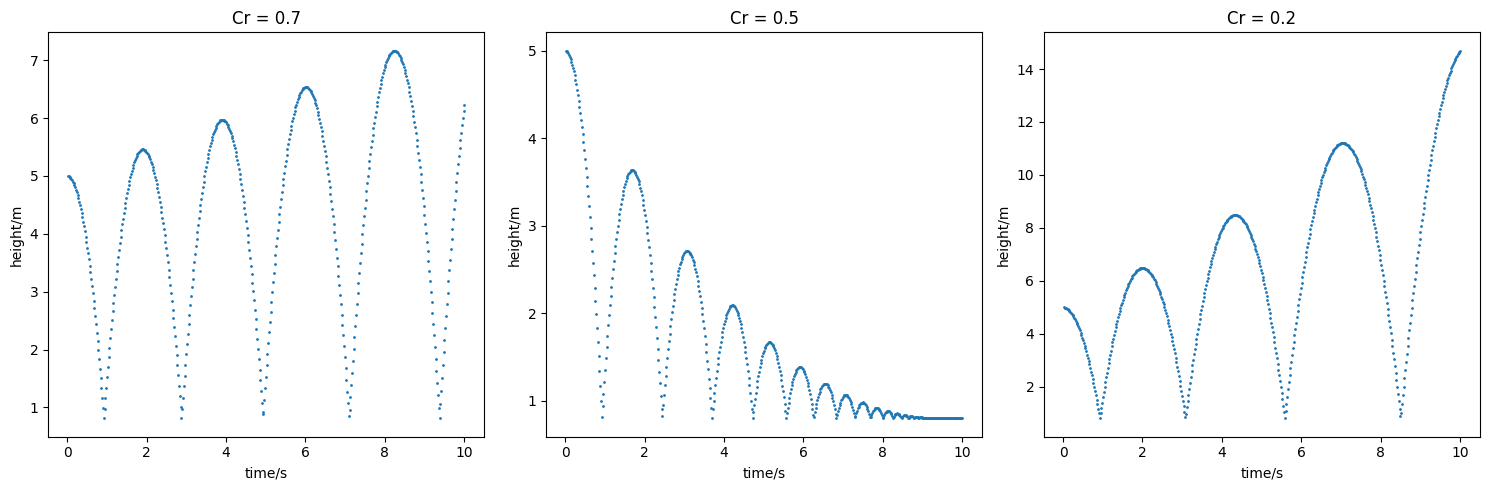

In [66]:
# 产生这种情况的原因是，在1e-4的碰撞时间步长下，如果正好发生穿深过大导致计算出来的碰撞力结合Cr过大，导致在第一次开始解决碰撞时速度由于
# 半隐式积分直接取反，然后下一个碰撞时间步长就直接蹦出，这种情况下就会出现Cr越小，能量越来越大的情况，Cr大的情况同理
# 因为穿深调整的过程，会让在检测到碰撞后，继续往里面穿透一个碰撞时间步长，就会导致能量越来越大的情况一定发生
# 但观察步长设置为1e-4的，没有穿深调整的步骤，穿深通常会比这种情况小，所以能量越来越大是概率发生的，不是像带了穿深调整的，一定发生的
# 所以说白了，这个问题是因为对于1e-4这个碰撞时间步长来说，e8的K是不可接受的，在最大单步长穿深下，会出现力过大导致的v直接反向更大并穿出，此时就会获得能量
# 所以获得能量的途径有：1. 初始穿深。2. 过大的反向力导致的半隐式积分的v直接取反导致的碰撞后速度大于碰撞前的速度，显式积分导致的碰撞后速度会更大
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

# Show the plot
plt.tight_layout()
plt.show()

In [63]:
num_of_ball = 3
new_timeline, new_z = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.001-dt0.0001-withPA.txt', 0.02, num_of_ball, 10)

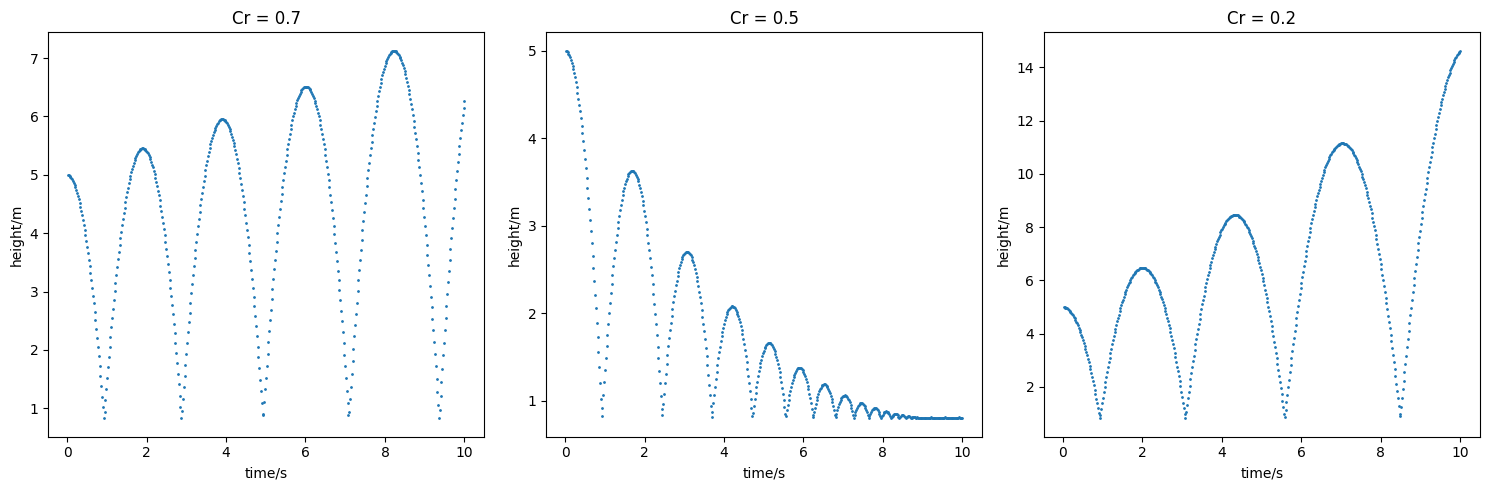

In [64]:
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

# Show the plot
plt.tight_layout()
plt.show()

In [69]:
num_of_ball = 3
new_timeline, new_z = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.0001-dt0.00001-withPA.txt', 0.02, num_of_ball, 10)

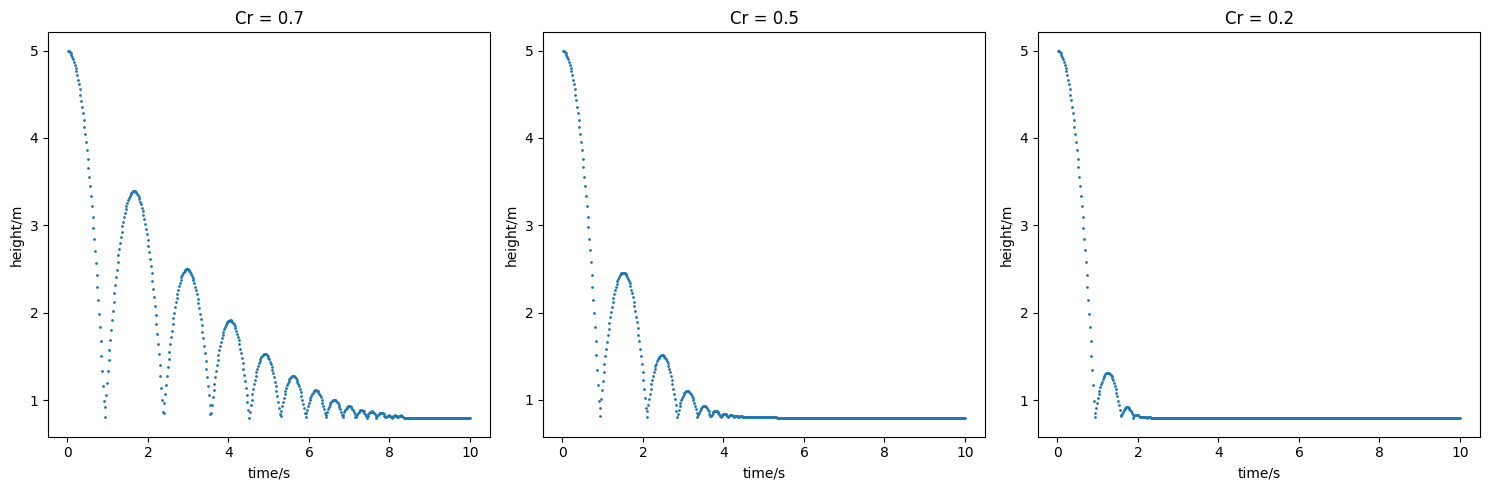

In [70]:
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

# Show the plot
plt.tight_layout()
plt.show()

In [144]:
num_of_ball = 3
new_timeline, new_z, new_vz, new_energy, dt = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.001-dt0.00001-withVs.txt', 0.02, num_of_ball, 10)

ValueError: could not convert string to float: '[[0.0,0.0,0.0,-0.0,0.0,-0.0],[0.0,0.0,5.0,0.0,0.0,-0.0],[0.0,0.7,5.0,0.0,0.0,-0.0],[0.0,-0.7,5.0,0.0,0.0,-0.0]]'

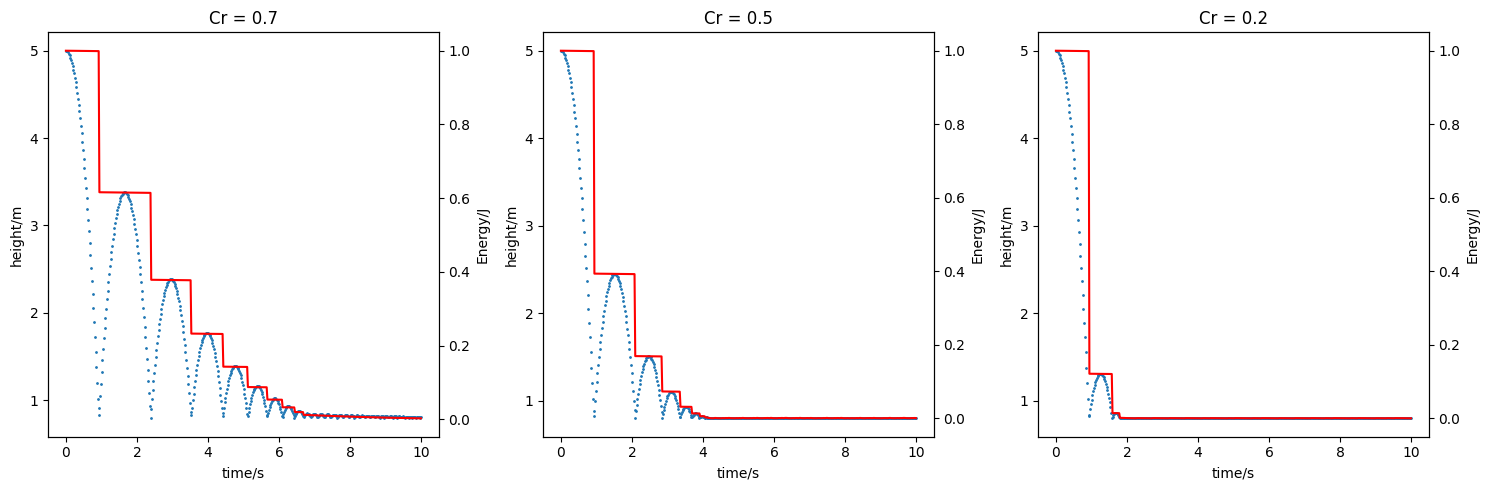

In [88]:
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

    ax2 = axs[j].twinx()
    ax2.plot(new_timeline, new_energy[j], 'r')
    ax2.set_ylabel('Energy/J')

# Show the plot
plt.tight_layout()
plt.show()

In [90]:
new_energy[0]

[1.0,
 0.9999755,
 0.9999510000000001,
 0.9999265000000002,
 0.9999019999999998,
 0.9998774999999999,
 0.9998530000000001,
 0.9998285000000001,
 0.9998051666666667,
 0.9997806666666667,
 0.9997561666666664,
 0.9997328333333331,
 0.9997083333333331,
 0.9996838333333327,
 0.9996593333333321,
 0.999634833333332,
 0.9996103333333316,
 0.9995858333333318,
 0.999561333333331,
 0.9995368333333307,
 0.9995123333333306,
 0.9994878333333314,
 0.9994633333333315,
 0.9994388333333323,
 0.999414333333333,
 0.9993898333333338,
 0.9993653333333341,
 0.999340833333335,
 0.9993163333333356,
 0.9992918333333364,
 0.9992673333333371,
 0.999242833333338,
 0.9992183333333389,
 0.9991938333333398,
 0.9991693333333407,
 0.9991448333333417,
 0.9991203333333426,
 0.9990958333333435,
 0.9990713333333445,
 0.9990468333333454,
 0.9990223333333466,
 0.9989978333333477,
 0.9989733333333487,
 0.9989488333333499,
 0.9989243333333508,
 0.6160000292055143,
 0.6159755292055135,
 0.6159510292055126,
 0.6159265292055117,


In [92]:
new_vz[0]

[0.0,
 -0.20580000000000004,
 -0.41159999999999963,
 -0.6173999999999997,
 -0.8232000000000004,
 -1.029000000000001,
 -1.2348000000000017,
 -1.4406000000000023,
 -1.636600000000003,
 -1.8424000000000036,
 -2.048200000000003,
 -2.2441999999999993,
 -2.4499999999999953,
 -2.6557999999999913,
 -2.8615999999999873,
 -3.0673999999999833,
 -3.2731999999999792,
 -3.4789999999999752,
 -3.684799999999971,
 -3.890599999999967,
 -4.096399999999967,
 -4.3021999999999725,
 -4.507999999999978,
 -4.713799999999983,
 -4.919599999999988,
 -5.125399999999994,
 -5.331199999999999,
 -5.537000000000004,
 -5.74280000000001,
 -5.948600000000015,
 -6.15440000000002,
 -6.360200000000026,
 -6.566000000000031,
 -6.771800000000036,
 -6.9776000000000415,
 -7.183400000000047,
 -7.389200000000052,
 -7.5950000000000575,
 -7.800800000000063,
 -8.006600000000068,
 -8.212400000000073,
 -8.418200000000079,
 -8.624000000000084,
 -8.82980000000009,
 -9.035600000000095,
 6.972582321445424,
 6.766782321445419,
 6.56098232144

In [177]:
dt


(9917, 8331)

In [162]:
num_of_ball = 3
new_timeline, new_z, new_vz, new_energy, new_realtime_rate, dt = process_ball_free_fall_state_data('state-log--2024-02-21--14-35-01--.txt', 0.02, num_of_ball, 10)

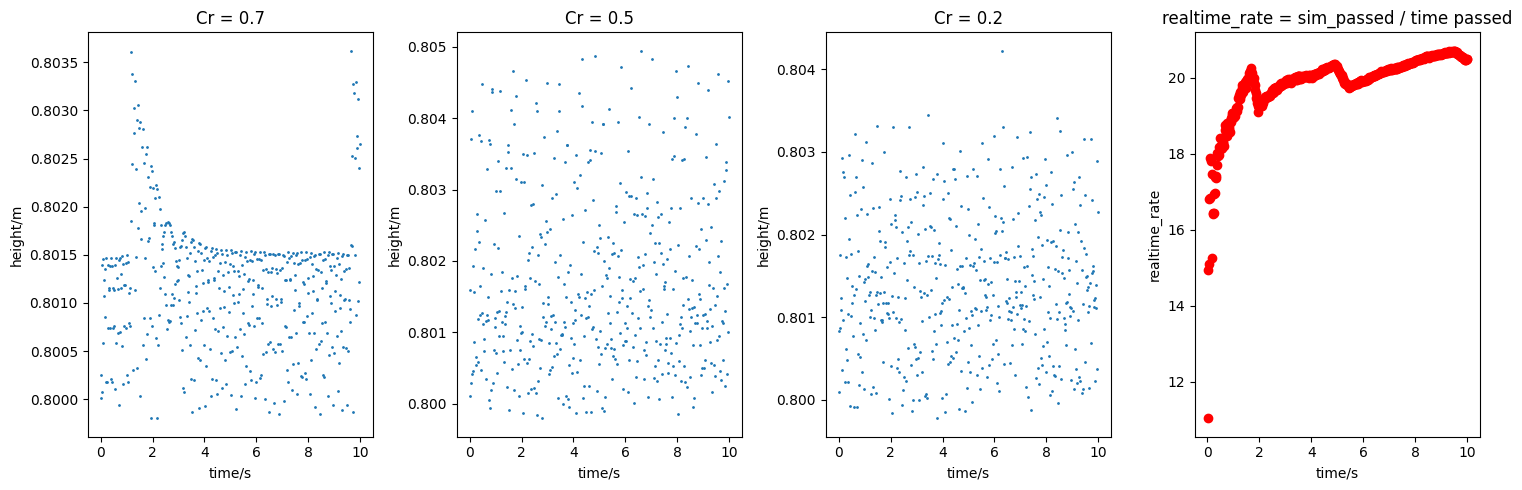

In [163]:
fig, axs = plt.subplots(1, num_of_ball + 1, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

    # ax2 = axs[j].twinx()
    # ax2.plot(new_timeline, new_energy[j], 'r')
    # ax2.set_ylabel('Energy/J')
axs[num_of_ball].scatter(new_timeline[1:], new_realtime_rate[1:], c="r")
axs[num_of_ball].set_xlabel('time/s')
axs[num_of_ball].set_ylabel('realtime_rate')
axs[num_of_ball].set_title("realtime_rate = sim_passed / time passed")


# Show the plot
plt.tight_layout()
plt.show()

In [164]:
dt

(9833, 16758)

In [165]:
num_of_ball = 3
new_timeline, new_z, new_vz, new_energy, new_realtime_rate, dt = process_ball_free_fall_state_data('state-log--2024-02-21--16-14-47--.txt', 0.02, num_of_ball, 10)

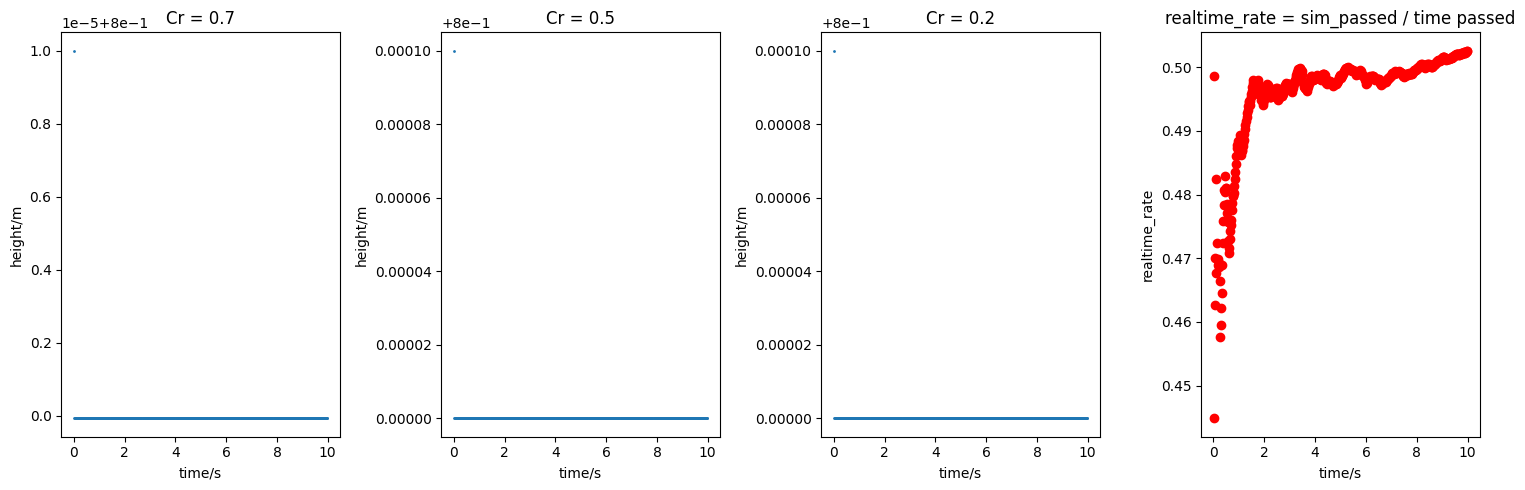

In [166]:
fig, axs = plt.subplots(1, num_of_ball + 1, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

    # ax2 = axs[j].twinx()
    # ax2.plot(new_timeline, new_energy[j], 'r')
    # ax2.set_ylabel('Energy/J')
axs[num_of_ball].scatter(new_timeline[1:], new_realtime_rate[1:], c="r")
axs[num_of_ball].set_xlabel('time/s')
axs[num_of_ball].set_ylabel('realtime_rate')
axs[num_of_ball].set_title("realtime_rate = sim_passed / time passed")


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
num_of_ball = 3
new_timeline, new_z = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.001-dt0.00001-withPA.txt', 0.02, num_of_ball, 10)

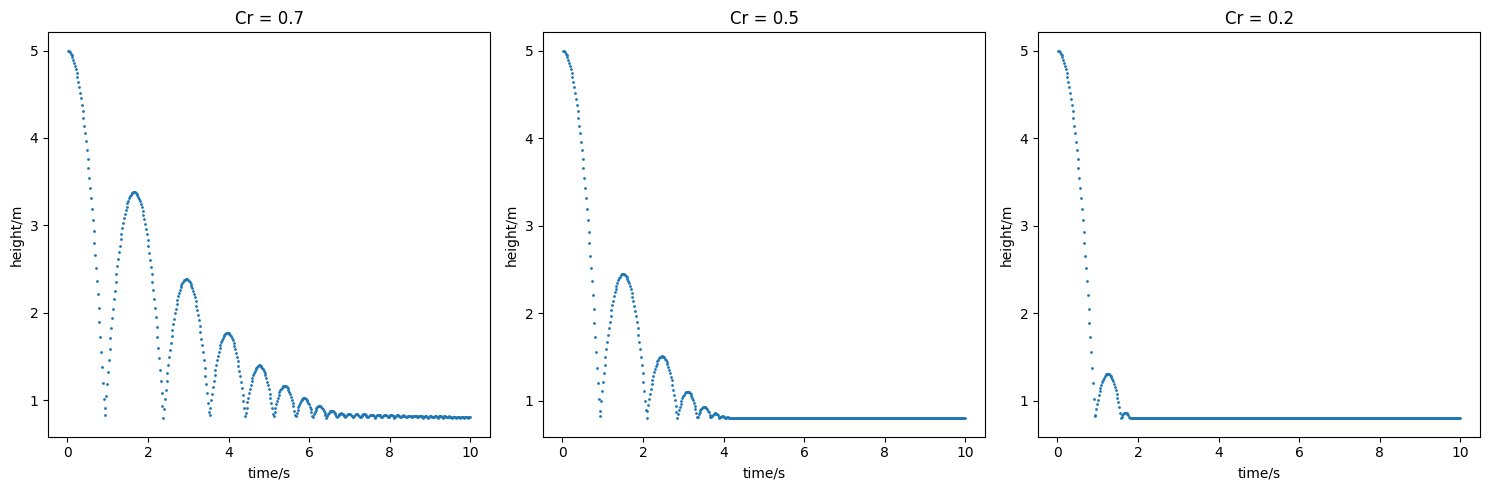

In [ ]:
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
num_of_ball = 3
new_timeline, new_z = process_ball_free_fall_state_data('state-log-three-ball-fall-Dt0.001-without-shrink.txt', 0.02, num_of_ball, 10)

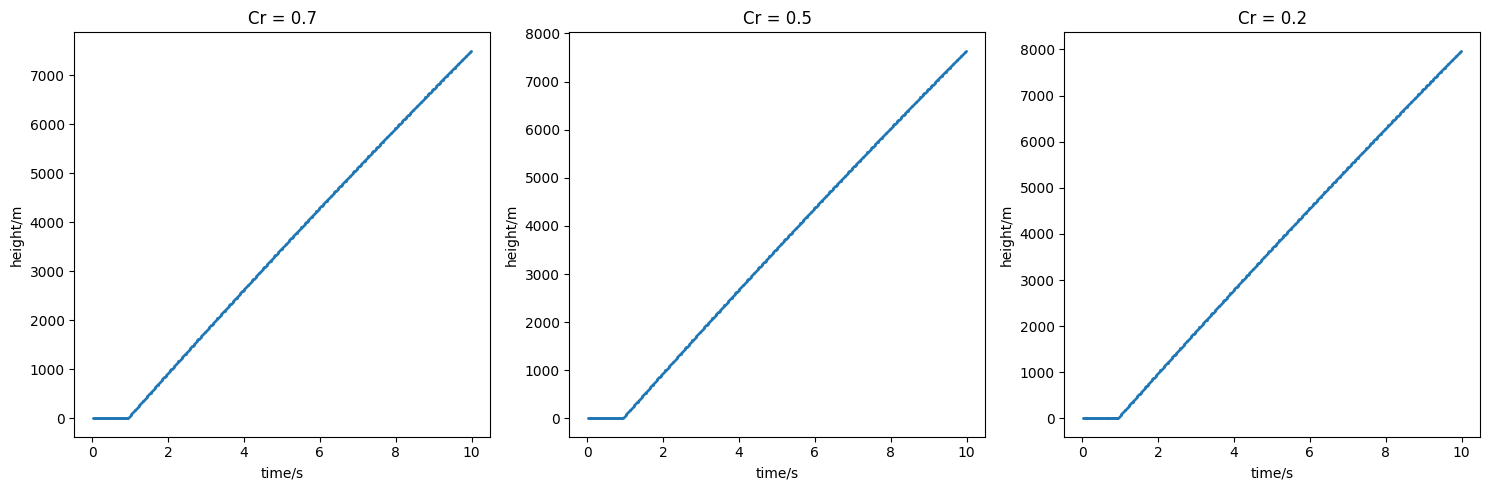

In [ ]:
fig, axs = plt.subplots(1, num_of_ball, figsize=(15, 5))
titles = ["Cr = 0.7", 'Cr = 0.5', 'Cr = 0.2']
for j in range(num_of_ball):
    # plt.scatter(timeline, balls_z[0], s=1)
    axs[j].scatter(new_timeline, new_z[j], s=1)
    # Add labels and title
    axs[j].set_xlabel('time/s')
    axs[j].set_ylabel('height/m')
    axs[j].set_title(titles[j])

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
def process_ball_free_fall_state_data(file_name, sample_gap, num_of_plots):
    timeline = []
    realtime_rate = []
    balls_z = [[] for i in range(num_of_plots)]
    balls_vz = [[] for i in range(num_of_plots)]
    with open(file_name, 'r') as file:
        line = file.readline()
        while line:
            result = line.split(" ")
            timeline.append(float(result[0]))
            realtime_rate.append(float(result[1]))
            parts_pe = json.loads(result[2])
            parts_vs = json.loads(result[3])
            for i in range(num_of_plots):
                balls_z[i].append(parts_pe[i + 1][2])
                balls_vz[i].append(parts_vs[i + 1][2])
            line = file.readline()

        new_z = [[] for i in range(num_of_plots)]
        new_vz = [[] for i in range(num_of_plots)]
        new_energy = [[] for i in range(num_of_plots)]
        new_timeline = []
        new_realtime_rate = []
        record_time = -10
        temp = 0
        num_of_Dt = 0
        num_of_dt = 0
        for i in range(len(timeline)):
            delta = timeline[i] - temp
            if (delta >= 0.0001): 
                num_of_Dt += 1
            if delta <= 0.00009: 
                num_of_dt += 1
            temp = timeline[i]
            
            if timeline[i] > record_time + sample_gap:
                new_timeline.append(timeline[i])
                new_realtime_rate.append(realtime_rate[i])
                for j in range(num_of_plots):
                    new_z[j].append(balls_z[j][i])
                    new_vz[j].append(balls_vz[j][i])
                    # new_energy[j].append(calculate_energy(balls_z[j][i], balls_vz[j][i]))
                record_time = timeline[i]
        
        # for i in range(num_of_plots):
        #     ref = new_energy[i][0]
        #     for j in range(len(new_energy[i])):
        #         new_energy[i][j] = new_energy[i][j] / ref
        return new_timeline, new_z, new_vz, new_energy, new_realtime_rate, (num_of_Dt, num_of_dt)

num_of_ball = 3
sample_gap = 0.02
file_path = 'D:\\Documents\\code\\sire\\install\\demo\\release\\demo_simulation_two_part_fall\\log\\state-log--2024-03-27--13-16-16--.txt'
result_Dt9 = process_ball_free_fall_state_data(file_path, sample_gap, num_of_ball)

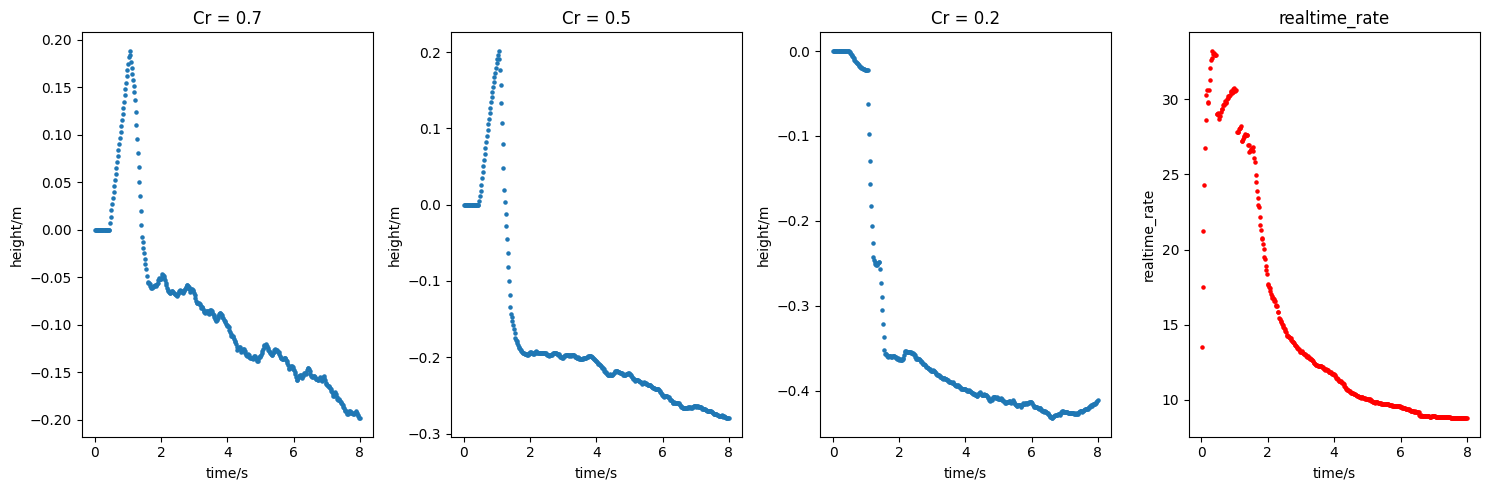

In [16]:
plot_with_boundary(result_Dt9, num_of_ball, 8)